In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
import requests

# Import the API key.
from config import weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


612

In [22]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | san quintin
Processing Record 4 of Set 1 | arawa
Processing Record 5 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | sisimiut
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | bonthe
Processing Record 14 of Set 1 | seydisehir
Processing Record 15 of Set 1 | avera
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | santo tomas
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | vila franca do campo
Processing 

Processing Record 38 of Set 4 | enshi
Processing Record 39 of Set 4 | esperance
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | mosquera
Processing Record 42 of Set 4 | zhanaozen
Processing Record 43 of Set 4 | upernavik
Processing Record 44 of Set 4 | starozhilovo
Processing Record 45 of Set 4 | marawi
Processing Record 46 of Set 4 | amurrio
Processing Record 47 of Set 4 | hvolsvollur
Processing Record 48 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 4 | oranjemund
Processing Record 50 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 1 of Set 5 | broome
Processing Record 2 of Set 5 | shenjiamen
Processing Record 3 of Set 5 | sorrento
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 5 | manavalakurichi
Processing Record 7 of Set 5 | lagunas
Processing Record 8 of Set 5 | mahebourg
Processing Record 9 of Set 5 | bamb

Processing Record 32 of Set 8 | clyde river
Processing Record 33 of Set 8 | taywarah
Processing Record 34 of Set 8 | kysyl-syr
Processing Record 35 of Set 8 | palana
Processing Record 36 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 37 of Set 8 | pochutla
Processing Record 38 of Set 8 | tiksi
Processing Record 39 of Set 8 | pimenta bueno
Processing Record 40 of Set 8 | sao filipe
Processing Record 41 of Set 8 | dalvik
Processing Record 42 of Set 8 | deyang
Processing Record 43 of Set 8 | flinders
Processing Record 44 of Set 8 | pushkino
Processing Record 45 of Set 8 | port-cartier
Processing Record 46 of Set 8 | grand-lahou
Processing Record 47 of Set 8 | tashtyp
Processing Record 48 of Set 8 | egvekinot
Processing Record 49 of Set 8 | pinega
Processing Record 50 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 1 of Set 9 | llanes
Processing Record 2 of Set 9 | dunedin
Processing Record 3 of Set 9 | port macquarie
Processing Record 4 of Set 9 | 

Processing Record 19 of Set 12 | marsh harbour
Processing Record 20 of Set 12 | kungurtug
Processing Record 21 of Set 12 | vangaindrano
Processing Record 22 of Set 12 | meulaboh
Processing Record 23 of Set 12 | concarneau
Processing Record 24 of Set 12 | jurm
Processing Record 25 of Set 12 | tekeli
Processing Record 26 of Set 12 | polovinnoye
Processing Record 27 of Set 12 | yelan-kolenovskiy
Processing Record 28 of Set 12 | mafinga
Processing Record 29 of Set 12 | sidhauli
Processing Record 30 of Set 12 | bani
Processing Record 31 of Set 12 | havre-saint-pierre
Processing Record 32 of Set 12 | manama
Processing Record 33 of Set 12 | tiarei
Processing Record 34 of Set 12 | galle
Processing Record 35 of Set 12 | acapulco
Processing Record 36 of Set 12 | tomohon
Processing Record 37 of Set 12 | nha trang
Processing Record 38 of Set 12 | coahuayana
Processing Record 39 of Set 12 | green river
Processing Record 40 of Set 12 | west wendover
Processing Record 41 of Set 12 | ercis
Processing 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,48.24,85,100,13.27,NZ,2022-04-06 02:47:56
1,Barrow,71.2906,-156.7887,-12.98,77,0,9.22,US,2022-04-06 02:47:56
2,San Quintin,30.4833,-115.9500,60.94,81,1,3.29,MX,2022-04-06 02:47:56
3,Arawa,-6.2132,155.5367,83.28,84,99,5.66,PG,2022-04-06 02:47:57
4,Qaanaaq,77.4840,-69.3632,9.16,91,100,0.96,GL,2022-04-06 02:47:57
5,Sisimiut,66.9395,-53.6735,25.07,96,99,3.56,GL,2022-04-06 02:47:58
6,Rikitea,-23.1203,-134.9692,78.66,68,62,17.63,PF,2022-04-06 02:44:06
7,Busselton,-33.6500,115.3333,69.01,47,100,6.29,AU,2022-04-06 02:47:58
8,Albany,42.6001,-73.9662,49.69,59,100,6.02,US,2022-04-06 02:46:08
9,Puerto Ayora,-0.7393,-90.3518,77.76,87,31,5.82,EC,2022-04-06 02:47:59


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
reordered_city_data_df = city_data_df[new_column_order]
reordered_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-04-06 02:47:56,-46.1927,168.8643,48.24,85,100,13.27
1,Barrow,US,2022-04-06 02:47:56,71.2906,-156.7887,-12.98,77,0,9.22
2,San Quintin,MX,2022-04-06 02:47:56,30.4833,-115.9500,60.94,81,1,3.29
3,Arawa,PG,2022-04-06 02:47:57,-6.2132,155.5367,83.28,84,99,5.66
4,Qaanaaq,GL,2022-04-06 02:47:57,77.4840,-69.3632,9.16,91,100,0.96


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
reordered_city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649215406.8656197

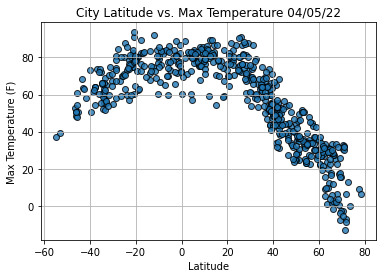

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

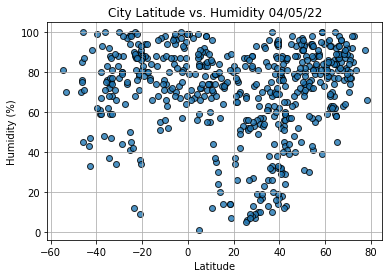

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

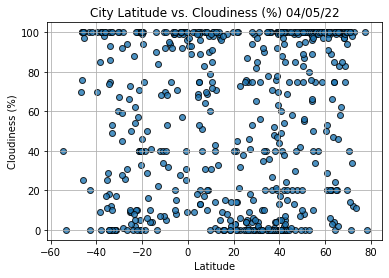

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

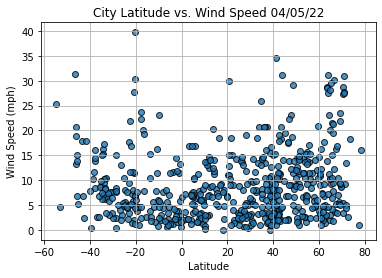

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()